In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv("futuristic_city_traffic.csv")

In [18]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [19]:
df.dtypes

City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week               object
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object

In [20]:
df

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027,0.3840
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122,0.5526
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568,0.0564
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116,0.5079


In [21]:
df.isnull().any(axis=0)

City                     False
Vehicle Type             False
Weather                  False
Economic Condition       False
Day Of Week              False
Hour Of Day              False
Speed                    False
Is Peak Hour             False
Random Event Occurred    False
Energy Consumption       False
Traffic Density          False
dtype: bool

**There are no null values in the dataset**

### Question 1: How does traffic density affect speed and Energy Consumption?

In [22]:
df[['Speed', 'Energy Consumption', 'Traffic Density']].corr()

,Speed,Energy Consumption,Traffic Density
Speed,1.000000,0.840122,-0.028211
Energy Consumption,0.840122,1.000000,0.015740
Traffic Density,-0.028211,0.015740,1.000000


In [23]:
model = LinearRegression()

In [24]:
model.fit(df['Traffic Density'].values.reshape(-1, 1), df['Speed'].values)
print("Linear Regresion on Speed on Traffic Density", model.coef_[0])
# sns.scatterplot(data=df, x='Traffic Density', y='Speed', color="black")

Linear Regresion on Speed on Traffic Density -3.4290894621586134


In [25]:
model.fit(df['Traffic Density'].values.reshape(-1, 1), df['Energy Consumption'].values)
print("Linear Regresion of Energy Consumption on Traffic Density", model.coef_[0])
# sns.scatterplot(data=df, x='Traffic Density', y='Energy Consumption', color="black")

Linear Regresion of Energy Consumption on Traffic Density 1.816126692472749


From the analysis we can see that:
1. As the traffic density increases by one unit, the speed deacreases by about 3.5 times
2. As the traffic density increases by one unit, the energy consumption increases by 1.8 times

### Question 2: Which day has higher traffic density?

D:\D11AD_36_Sem6\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


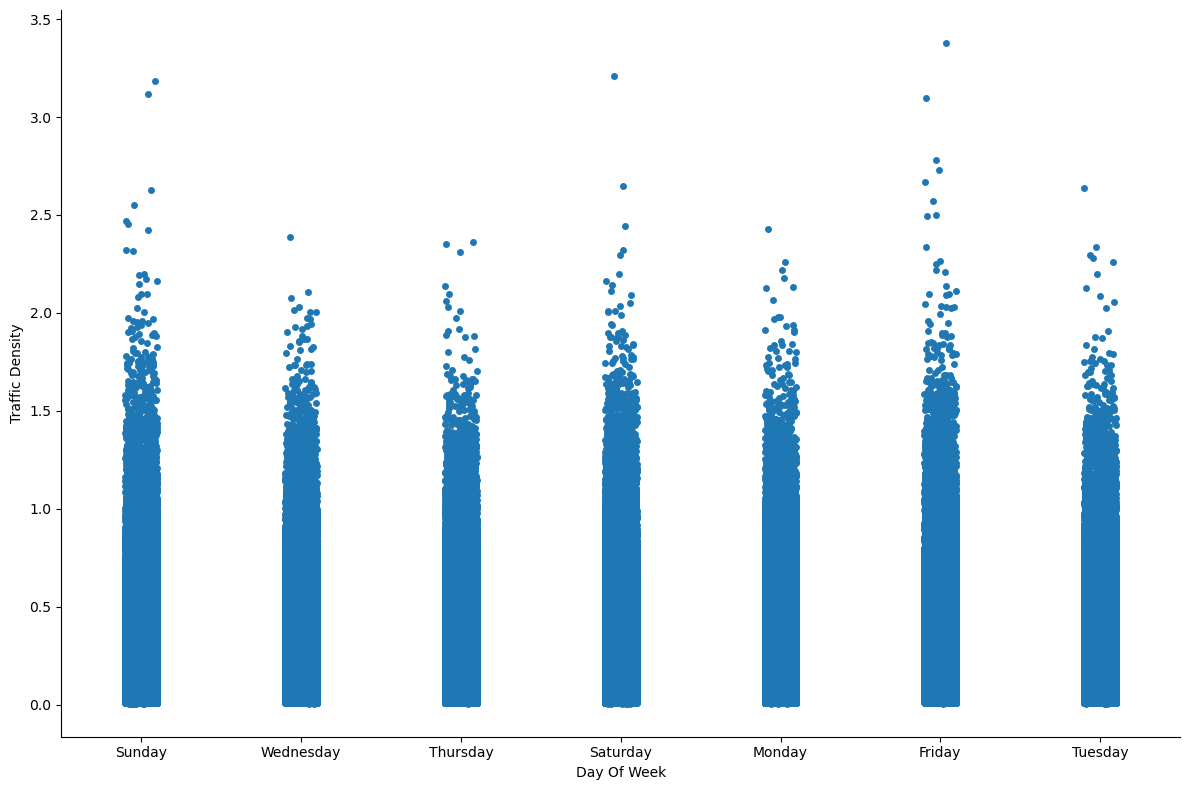

In [58]:
# Displaying medians
sns.catplot(data=df, x='Day Of Week', y='Traffic Density', height=8, aspect=1.5)

In [35]:
# Displaying day wise distribution
df[['Traffic Density', 'Day Of Week']].groupby('Day Of Week').agg('median')

,Traffic Density
Day Of Week,
Friday,0.2192
Monday,0.2149
Saturday,0.2270
Sunday,0.2269
Thursday,0.2133
Tuesday,0.2152
Wednesday,0.2148


In [36]:
df[['Traffic Density', 'Day Of Week']].groupby('Day Of Week').agg('mean')

,Traffic Density
Day Of Week,
Friday,0.280504
Monday,0.273950
Saturday,0.283474
Sunday,0.283350
Thursday,0.272366
Tuesday,0.272943
Wednesday,0.273143


From the analysis it is visible that there isn't a noticeable difference in traffic based on Days of the Week

### Question 3: Which City allows which vehicles at highest speeds?

D:\D11AD_36_Sem6\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


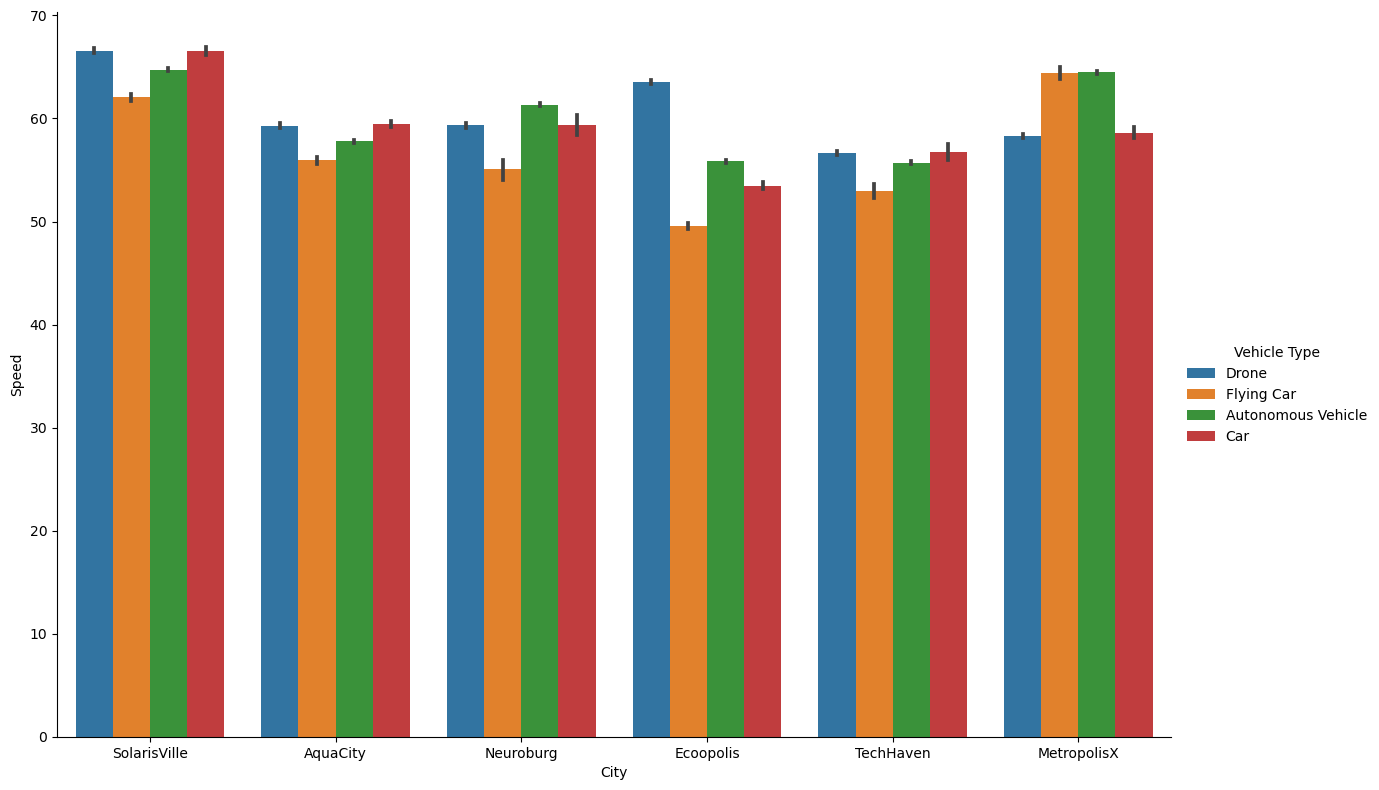

In [59]:
sns.catplot(data=df, x="City", y="Speed", hue="Vehicle Type", kind="bar", height=8, aspect=1.5)

### Question 4: Which City has more peak hours?

In [55]:
df_filtered = df.loc[df['Is Peak Hour'] == 1]

<Axes: xlabel='City', ylabel='count'>

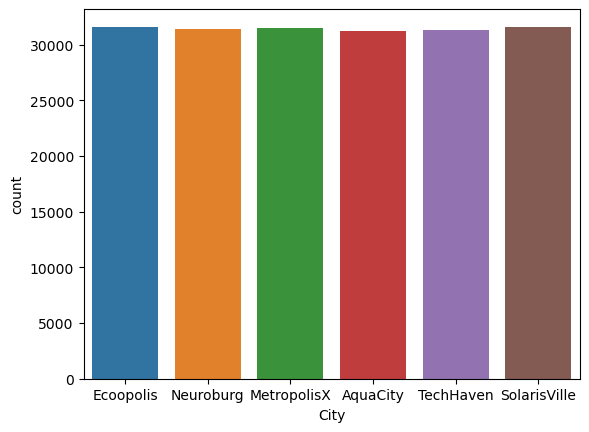

In [56]:
sns.countplot(x='City', data=df_filtered)

### Question 5: Which vehicles has greater energy consumption?

D:\D11AD_36_Sem6\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


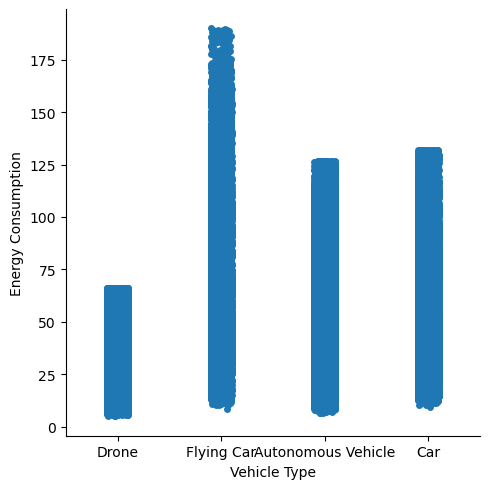

In [57]:
sns.catplot(data=df, x='Vehicle Type', y='Energy Consumption')